In [164]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
import seaborn as sns
import os
import warnings

In [165]:
veriler = pd.read_csv("cars.csv")
veriler.head(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
5,Maruti Alto LX BSIII,2007,140000,125000,Petrol,Individual,Manual,First Owner
6,Hyundai Xcent 1.2 Kappa S,2016,550000,25000,Petrol,Individual,Manual,First Owner
7,Tata Indigo Grand Petrol,2014,240000,60000,Petrol,Individual,Manual,Second Owner
8,Hyundai Creta 1.6 VTVT S,2015,850000,25000,Petrol,Individual,Manual,First Owner
9,Maruti Celerio Green VXI,2017,365000,78000,CNG,Individual,Manual,First Owner


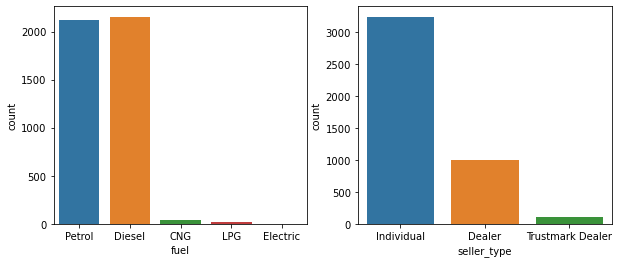

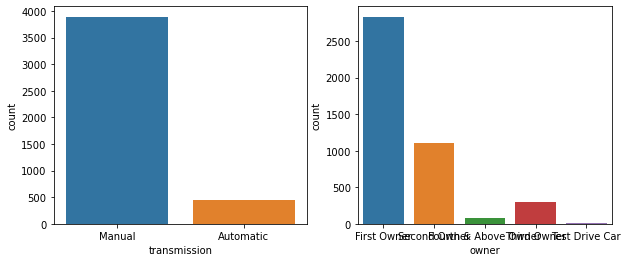

In [166]:
cat_cols = ['fuel','seller_type','transmission','owner']
i=0
while i < 4:
    fig = plt.figure(figsize=[10,4])
    #ax1 = fig.add_subplot(121)
    #ax2 = fig.add_subplot(122)
    
    #ax1.title.set_text(cat_cols[i])
    plt.subplot(1,2,1)
    sns.countplot(x=cat_cols[i], data=veriler)
    i += 1
    
    #ax2.title.set_text(cat_cols[i])
    plt.subplot(1,2,2)
    sns.countplot(x=cat_cols[i], data=veriler)
    i += 1
    
    plt.show()

In [119]:
year = veriler.iloc[:,1:2].values
year

array([[2007],
       [2007],
       [2012],
       ...,
       [2009],
       [2016],
       [2016]], dtype=int64)

In [120]:
selling_price = veriler.iloc[:,2:3].values
selling_price

array([[ 60000],
       [135000],
       [600000],
       ...,
       [110000],
       [865000],
       [225000]], dtype=int64)

In [121]:
km_driven = veriler.iloc[:,3:4].values
km_driven

array([[ 70000],
       [ 50000],
       [100000],
       ...,
       [ 83000],
       [ 90000],
       [ 40000]], dtype=int64)

In [122]:
fuel = veriler.iloc[:,4:5].values
fuel

array([['Petrol'],
       ['Petrol'],
       ['Diesel'],
       ...,
       ['Petrol'],
       ['Diesel'],
       ['Petrol']], dtype=object)

In [123]:
fuelLe= preprocessing.LabelEncoder()
fuel[:,0] = fuelLe.fit_transform(veriler.iloc[:,4:5])
fuel

array([[4],
       [4],
       [1],
       ...,
       [4],
       [1],
       [4]], dtype=object)

In [124]:
seller_type = veriler.iloc[:,5:6].values
seller_type

array([['Individual'],
       ['Individual'],
       ['Individual'],
       ...,
       ['Individual'],
       ['Individual'],
       ['Individual']], dtype=object)

In [125]:
seller_typeLe= preprocessing.LabelEncoder()
seller_type[:,0] = seller_typeLe.fit_transform(veriler.iloc[:,5:6])

seller_type

array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1]], dtype=object)

In [126]:
transmission = veriler.iloc[:,6:7].values
transmission

array([['Manual'],
       ['Manual'],
       ['Manual'],
       ...,
       ['Manual'],
       ['Manual'],
       ['Manual']], dtype=object)

In [127]:
transmissionLe= preprocessing.LabelEncoder()
transmission[:,0] = transmissionLe.fit_transform(veriler.iloc[:,6:7])
transmission

array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1]], dtype=object)

In [128]:
owner = veriler.iloc[:,7:8].values
owner

array([['First Owner'],
       ['First Owner'],
       ['First Owner'],
       ...,
       ['Second Owner'],
       ['First Owner'],
       ['First Owner']], dtype=object)

In [169]:
ownerLe= preprocessing.LabelEncoder()
owner[:,0] = ownerLe.fit_transform(veriler.iloc[:,7:8])
owner.shape

(4340, 1)

In [170]:
verim1 = pd.DataFrame(data=fuel, index = range(4340), columns=["Benzin Turu"])
verim2 = pd.DataFrame(data=seller_type, index = range(4340), columns=["Satici Tipi"])
verim3 = pd.DataFrame(data=transmission, index = range(4340), columns=["Vites Turu"])
verim4 = pd.DataFrame(data=owner, index = range(4340), columns=["Sahibi"])
verim5 = pd.DataFrame(data=year, index = range(4340), columns=["Yil"])
verim6 = pd.DataFrame(data=selling_price, index = range(4340), columns=["Fiyati"])
verim7 = pd.DataFrame(data=km_driven, index = range(4340), columns=["KM"])
sonuc = pd.concat([verim1,verim2,verim3,verim4,verim5,verim7], axis =1)
sonuc2 = pd.concat([sonuc,verim6], axis = 1)
sonuc2

,Benzin Turu,Satici Tipi,Vites Turu,Sahibi,Yil,KM,Fiyati
0,4,1,1,0,2007,70000,60000
1,4,1,1,0,2007,50000,135000
2,1,1,1,0,2012,100000,600000
3,4,1,1,0,2017,46000,250000
4,1,1,1,2,2014,141000,450000
...,...,...,...,...,...,...,...
4335,1,1,1,2,2014,80000,409999
4336,1,1,1,2,2014,80000,409999
4337,4,1,1,2,2009,83000,110000
4338,1,1,1,0,2016,90000,865000


In [172]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

In [185]:
X_train, X_test, y_train, y_test = train_test_split(sonuc, verim6, test_size=0.33, random_state=49)


In [206]:
y_test

,Fiyati
3418,250000
3906,550000
3194,525000
4067,1050000
1514,275000
...,...
3092,665000
2419,409999
2854,254999
4143,51111


In [209]:
CV = []
R2_train = []
R2_test = []

def car_pred_model(model,model_name):
    # Training model
    model.fit(X_train,y_train)
            
    # R2 score'in train seti
    y_pred_train = model.predict(X_train)
    R2_train_model = r2_score(y_train,y_pred_train)
    R2_train.append(round(R2_train_model,2))
    
    
    
    # R2 score'in test seti
    y_pred_test = model.predict(X_test)
    R2_test_model = r2_score(y_test,y_pred_test)
    R2_test.append(round(R2_test_model,2))
    
    print("y_test",y_test)
    print("y_pred_test",y_pred_test)
    
    # Cross-Validation kullanan Train setinin R2 ortalaması
    #veriyi ardarda 5 kere hesaplıyoruz.
    cross_val = cross_val_score(model ,X_train ,y_train ,cv=5)
    cv_mean = cross_val.mean()
    CV.append(round(cv_mean,2))
    
    # Printing results
    print("Train R2-score :",round(R2_train_model,2))
    print("Test R2-score :",round(R2_test_model,2))
    print("Train CV scores :",cross_val)
    print("Train CV mean :",round(cv_mean,2))
    
    # Plotting Graphs 
    # Residual Plot of train data
    fig, ax = plt.subplots(1,2,figsize = (10,4))
    ax[0].set_title('Residual Plot of Train samples')
    sns.distplot((y_train-y_pred_train),hist = False,ax = ax[0])
    ax[0].set_xlabel('y_train - y_pred_train')
    
    # Y_test vs Y_train scatter plot
    ax[1].set_title('y_test vs y_pred_test')
    ax[1].scatter(x = y_test, y = y_pred_test)
    ax[1].set_xlabel('y_test')
    ax[1].set_ylabel('y_pred_test')
    
    plt.show()

y_test        Fiyati
3418   250000
3906   550000
3194   525000
4067  1050000
1514   275000
...       ...
3092   665000
2419   409999
2854   254999
4143    51111
421   1044999

[1433 rows x 1 columns]
y_pred_test [[ 999031.56198846]
 [ 530844.35654804]
 [ 476765.09437047]
 ...
 [  90097.77410847]
 [-153288.70730959]
 [ 732470.95099229]]
Train R2-score : 0.44
Test R2-score : 0.46
Train CV scores : [0.42007886 0.46213737 0.42388268 0.42315745 0.4461614 ]
Train CV mean : 0.44


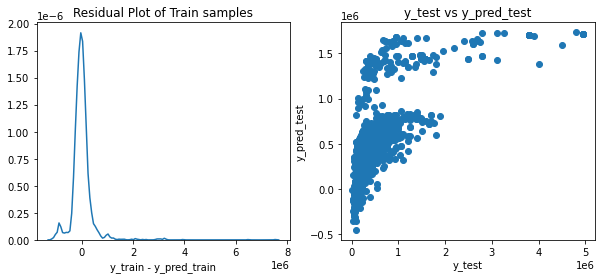

In [210]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
car_pred_model(lr,"Linear_regressor.pkl")